<a href="https://colab.research.google.com/github/KIrie-0217/Python_practice/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86%E3%81%AE%E5%9F%BA%E7%A4%8E_%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ヒストグラムの計算

- ヒストグラムとは？
  - 縦軸にピクセル数
  - 横軸にピクセル値
- 画像の傾向を見るのに用いる

[   0    1    2    2    9    4   10    3    8   12 1005 1194 2415 3190
 1680 1332 1127  781  569  448  514  570  686  893  966 1228 1462 1573
 1761 1940 2190 2247 2432 2498 2599 2754 2921 2959 2791 2811 2717 2730
 2651 2593 2472 2592 2479 2420 2436 2336 2242 2246 2154 2113 2045 1989
 2045 2013 1967 2086 2046 2029 2008 1927 1893 1906 1901 1867 1810 1738
 1691 1756 1800 1718 1780 1720 1832 1870 1797 1968 2038 2015 1790 1533
 1390 1424 1463 1371 1419 1348 1283 1306 1307 1327 1173 1224 1259 1286
 1238 1293 1237 1227 1191 1205 1200 1284 1211 1281 1220 1201 1293 1244
 1170 1227 1150 1142 1150 1069 1111 1133 1094 1104 1114 1126 1106 1077
 1077 1085 1053 1140 1076 1037 1026 1076 1020 1012 1132 1176 1152 1122
 1139 1122 1104 1090 1165 1100 1076 1094 1089 1066 1101 1188 1127 1148
 1166 1190 1202 1207 1330 1315 1285 1344 1363 1406 1469 1543 1559 1563
 1681 1742 1794 1775 1911 1903 2086 2161 2156 2273 2386 2436 2514 2568
 2589 2775 2762 3014 2885 3005 3040 3060 3050 3221 3254 3272 3344 3454
 3526 

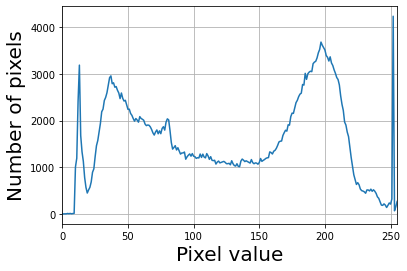

In [31]:

# 入力画像を読み込み
img = cv2.imread("/content/apple_01.jpg")
# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 方法1(NumPyでヒストグラムの算出)
hist, bins = np.histogram(gray.ravel(),256,[0,256])

# 方法2(OpenCVでヒストグラムの算出)
#hist = cv2.calcHist([img],[0],None,[256],[0,256])

# ヒストグラムの中身表示
print(hist)


# グラフの作成
plt.xlim(0, 255)
plt.plot(hist)
plt.xlabel("Pixel value", fontsize=20)
plt.ylabel("Number of pixels", fontsize=20)
plt.grid()
plt.show()


## RGBのヒストグラム

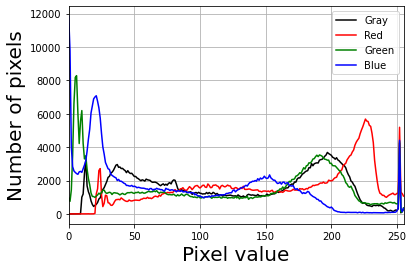

In [25]:
b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]

# 方法1(NumPyでヒストグラムの算出)
hist_r, bins = np.histogram(r.ravel(),256,[0,256])
hist_g, bins = np.histogram(g.ravel(),256,[0,256])
hist_b, bins = np.histogram(b.ravel(),256,[0,256])

# グラフの作成
plt.xlim(0, 255)
plt.plot(hist,"k",label = "Gray")
plt.plot(hist_r, "-r", label="Red")
plt.plot(hist_g, "-g", label="Green")
plt.plot(hist_b, "-b", label="Blue")
plt.xlabel("Pixel value", fontsize=20)
plt.ylabel("Number of pixels", fontsize=20)
plt.legend()
plt.grid()
plt.show()

## 線形濃度変換

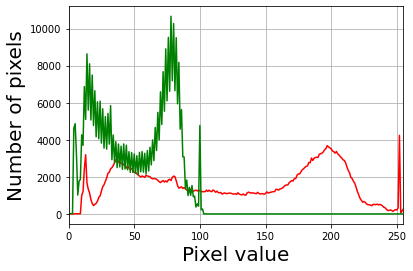

True

In [34]:

# 線形濃度変換
a, k = 0.4, 20

# 変換1
gray_new = a * gray    

# 変換2
# gray_new = gray + k    

# 画素値を0～255の範囲内に収める
gray_new[gray_new < 0] = 0
gray_new[gray_new > 255] = 255


# NumPyでヒストグラムの算出
hist1, bins1 = np.histogram(gray.ravel(),256,[0,256])
hist2, bins2 = np.histogram(gray_new.ravel(),256,[0,256])

# グラフの作成
plt.xlim(0, 255)
plt.plot(hist1, "-r", label="gray")
plt.plot(hist2, "-g", label="gray_new")
plt.xlabel("Pixel value", fontsize=20)
plt.ylabel("Number of pixels", fontsize=20)
plt.grid()
plt.show()

# 画像の書き込み
cv2.imwrite("./apple_gray.jpg",gray)
cv2.imwrite("./apple_gray_new.jpg",gray_new)

## 課題

- HSVで画像を取得して明度のヒストグラムを表示してみよう

ヒント： hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) でRGBからHSVに変換可能  


In [ ]:
def rgb_to_hsv(src, ksize=3):
    # 高さ・幅・チャンネル数を取得
    h, w, c = src.shape
    
    # 入力画像と同じサイズで出力画像用の配列を生成(中身は空)
    dst = np.empty((h, w, c))

    for y in range(0, h):
        for x in range(0, w):
            # R, G, Bの値を取得して0～1の範囲内にする
            [b, g, r] = src[y][x]/255.0

            # R, G, Bの値から最大値と最小値を計算
            mx, mn = max(r, g, b), min(r, g, b)
            
            # 最大値 - 最小値
            diff = mx - mn

            # Hの値を計算
            if mx == mn : h = 0
            elif mx == r : h = 60 * ((g-b)/diff)     
            elif mx == g : h = 60 * ((b-r)/diff) + 120  
            elif mx == b : h = 60 * ((r-g)/diff) + 240
            if h < 0 : h = h + 360
                
            # Sの値を計算
            if mx != 0:s = diff/mx       
            else: s = 0
            
            # Vの値を計算
            v = mx
            
            # Hを0～179, SとVを0～255の範囲の値に変換
            dst[y][x] = [h * 0.5, s * 255, v * 255]

    return dst
